# Notebook pour le tracé des séries temporelles d'indicateurs  (STATS)
## Pour la comparaison de plusieurs indicateurs pour une même zone

### Initialisation contexte test appli

In [15]:
import os

WRK_DIR = os.path.normpath('D:/MATHIS/0_Projet_Secheresse/1_Scripts/toolbox/eo4dm-oeil/EO4DM')
os.chdir(WRK_DIR)
WRK_DIR= os.path.join('Y:/EO4DM')

TERRITORY = 'New Caledonia (Fr)'
PRODUCTS_AX1 = ['MAI-ASCAT','MAI-SMAP']
PRODUCTS_AX2 = []              # if no ax2, set []
PRODUCTS = PRODUCTS_AX1+PRODUCTS_AX2
LANDMASKS = ['','']      # if no mask, set ''
PERIODS = ['M','M']    # D=decade, M=month
AREA = 'POUEMBOUT'
PLOT_COLOR = ['black','red']

TERRITORY_str = TERRITORY.replace(' ', '_').replace('(', '').replace(')', '')
DATA_HISTO = os.path.join(WRK_DIR,'DATA_HISTO',TERRITORY_str)
ANNEX_DIR = os.path.join(WRK_DIR,'ANNEX',TERRITORY_str)

INDIR_STATS = [os.path.join('D:/MATHIS/0_Projet_Secheresse/1_Scripts/toolbox/eo4dm-oeil/DMPIPELINE_WORKST/DATA_HISTO_backup/New_Caledonia_Fr/1_INDICATEURS/ALERT/MAI/STATS'),
               os.path.join('D:/MATHIS/0_Projet_Secheresse/1_Scripts/toolbox/eo4dm-oeil/DMPIPELINE_WORKST/DATA_HISTO_backup/New_Caledonia_Fr/1_INDICATEURS/ALERT/MAI_GEE_SMAP/STATS')]


In [16]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

### Prépare le dossier de sortie

In [17]:
# --- Generate directories/sub-directories ---
OUTDIR_STATS = os.path.join(WRK_DIR, f'PLOT_TIME_SERIES_DROUGHT_{TERRITORY_str}')
os.umask(0) # used to reset the directories permission
if not os.path.exists(OUTDIR_STATS):
    os.makedirs(OUTDIR_STATS)
    os.chmod(OUTDIR_STATS, 0o777)

### Lecture et préparation des données

In [18]:
INSTATS_DF = {}

for i in range(len(PRODUCTS)):

    if 'SPI' in PRODUCTS[i]:
        instats_csv = glob.glob(os.path.join(INDIR_STATS[i], f'*SPI*{PERIODS[i]}*.csv'))[0]
    elif 'MAI' in PRODUCTS[i]:
        instats_csv = glob.glob(os.path.join(INDIR_STATS[i], f'*MAI*{PERIODS[i]}*.csv'))[0]
    else:
        instats_csv = glob.glob(os.path.join(INDIR_STATS[i], f'*{PRODUCTS[i]}*{PERIODS[i]}*{LANDMASKS[i]}*.csv'))[0]
    instats_df = pd.read_csv(instats_csv, sep=';',decimal='.')

    instats_df['DATE'] = pd.to_datetime(instats_df.DATE, format='mixed')
    instats_df = instats_df[instats_df['LOCATION']==AREA]

    INSTATS_DF[PRODUCTS[i]] = instats_df

    del instats_df


In [19]:
INSTATS_DF

{'MAI-ASCAT':        LOCATION       DATE  MEAN   MIN   MAX   STD  QSCORE
 4920  POUEMBOUT 2007-01-01 -0.32 -0.79  0.18  0.33    0.56
 4921  POUEMBOUT 2007-02-01 -1.24 -1.46 -1.08  0.12    0.80
 4922  POUEMBOUT 2007-03-01 -1.00 -1.29 -0.87  0.14    0.86
 4923  POUEMBOUT 2007-04-01 -0.27 -0.43  0.03  0.16    0.85
 4924  POUEMBOUT 2007-05-01 -0.94 -1.11 -0.68  0.17    0.88
 ...         ...        ...   ...   ...   ...   ...     ...
 5120  POUEMBOUT 2023-09-01  0.63  0.38  0.95  0.19    0.85
 5121  POUEMBOUT 2023-10-01  1.37  1.10  1.66  0.17    0.88
 5122  POUEMBOUT 2023-11-01  0.71  0.35  1.07  0.23    0.85
 5123  POUEMBOUT 2023-12-01 -0.69 -0.91 -0.52  0.12    0.88
 5124  POUEMBOUT 2024-01-01 -0.67 -0.87 -0.45  0.13    0.86
 
 [205 rows x 7 columns],
 'MAI-SMAP':        LOCATION       DATE  MEAN   MIN   MAX   STD  QSCORE
 26    POUEMBOUT 2015-04-01  0.75  0.21  1.62  0.44    0.78
 60    POUEMBOUT 2015-05-01  1.06  0.90  1.30  0.12    0.78
 94    POUEMBOUT 2015-06-01  0.70  0.43  0.98  0

### Tracé et export du graphe

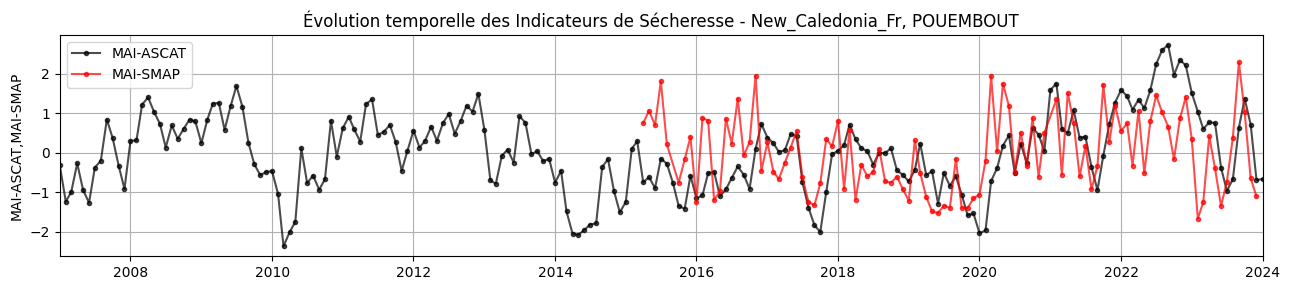

In [20]:
count=0
LINES_LEG = [0]*len(PRODUCTS)
ax_datemin = '2007/01'
ax_datemax = '2024/01'

fig, ax1 = plt.subplots(figsize=(13, 3))
for product in PRODUCTS_AX1:
    instats_df = INSTATS_DF[product].sort_values(by='DATE')
    x_data = instats_df['DATE']
    if ('SPI' in product) and ('CHIRPS' not in product): y_data = instats_df['SPI3_MENS']
    else: y_data = instats_df['MEAN']
    LINES_LEG[count], = ax1.plot(x_data, y_data, marker='o', markersize=3, alpha=0.7, label=product, color=PLOT_COLOR[count])
    count+=1
ax1.grid(True)
ax1.set_ylabel(','.join(PRODUCTS_AX1))
ax1.tick_params('y', colors='black')

if len(PRODUCTS_AX2)!=0:
    count=len(PRODUCTS_AX1)
    ax2 = ax1.twinx()
    for product in PRODUCTS_AX2:
        instats_df = INSTATS_DF[product].sort_values(by='DATE')
        x_data = instats_df['DATE']
        if ('SPI' in product) and ('CHIRPS' not in product): y_data = instats_df['SPI3_MENS']
        else: y_data = instats_df['MEAN']
        LINES_LEG[count], = ax2.plot(x_data, y_data, marker='o', markersize=3, alpha=0.7, label=product, color=PLOT_COLOR[count])
        count+=1
    # ax2.grid(True)
    ax2.set_ylabel(','.join(PRODUCTS_AX2))
    ax2.tick_params('y', colors='black')

plt.title(f'Évolution temporelle des Indicateurs de Sécheresse - {TERRITORY_str}, {AREA}')
ax1.set_xlim(xmin=pd.to_datetime(ax_datemin, format='%Y/%m'), xmax=pd.to_datetime(ax_datemax, format='%Y/%m'))
labels = [line.get_label() for line in LINES_LEG]
plt.legend(LINES_LEG, labels)
fig.tight_layout()
plt.show()

period_str = [i for i in PERIODS if i!=''][0]
products_str = '-'.join(PRODUCTS)
fig.savefig(os.path.join(OUTDIR_STATS, f'timeseries_{period_str}_{(products_str)}_{TERRITORY_str}_{AREA}.png'), dpi=300)
